# FEEDBACK ANALYSIS

During the Beta Phase, a google form will appear in the banner of the project. You will be able to access an exel file with the answers. In this script we visualize the answers with pie charts, bar plots, and simple print statements. Since this google form is the same for every project, you can easily use this script for your data.

In [2]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Here you can put instead your data file's path
filename_feedback = '/home/anna/Desktop/SUNDIAL/feedback.txt'

In [4]:
def read(path):
    with open(path, 'r', encoding="utf-8") as f:
        return f.read().splitlines()

In [5]:
feedback = read(filename_feedback)

In [73]:
def answers_count(answer, question_number):
    answers = 0 
    for line in feedback[1:]:
        row = line.split('\t')
        if len(row) == 19 and row[question_number]== answer:
            answers += 1
    return answers


def all_yes_pie(question_asked, answers, how_many):
    fig, ax = plt.subplots()
    ax.pie(only_yes,labels=['Yes'], autopct='%1.1f%%', startangle=90,textprops=dict(color="w", size =30), colors = ['lightseagreen'])
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax.set_title(question_asked, size = 20)
    ax.legend(answers,
      title="Answers",
      loc="center left",
      bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show()

    
def mixed_pie(question_asked, answers, how_many):
    fig, ax = plt.subplots()
    ax.pie(how_many,labels=answers, autopct='%1.1f%%', startangle=90,textprops=dict(color="w", size =20), colors = ['lightseagreen','orange'])
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax.set_title(question_asked, size = 20)
    ax.legend(answers,
      title="Answers",
      loc="center left",
      bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show()
    
    
def pie_chart(question_number):

    answers = ['Yes', 'No'] 
    question_asked = feedback[0].split('\t')[question_number]
    
    answer_yes = answers_count('Yes', question_number)
    answer_no = answers_count('No', question_number)
    

    how_many = [answer_yes, answer_no]
    only_yes = [answer_yes]
    
    if answer_no == 0:
        all_yes_pie(question_asked, answers, how_many)
    else:    
        mixed_pie(question_asked, answers, how_many)


def bars(question_asked, answers, how_many):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.set_title(question_asked, size = 20)
    ax.bar(answers, how_many, color = ['darkorange', 'orange','lightseagreen', 'turquoise'])
    plt.show()
        
def bar_plot(question_number):
    
    very_easy = answers_count('Very easy', question_number )
    somewhat_hard = answers_count('Somewhat hard', question_number)
    mod_easy = answers_count('Moderately easy', question_number)
    very_hard = answers_count('Very hard', question_number)
    
    question_asked = feedback[0].split('\t')[question_number]
    answers = ['Very hard', 'Somewhat hard', 'Moderately easy', 'Very easy']
    how_many = [very_hard, somewhat_hard, mod_easy, very_easy]
    
    bars(question_asked, answers, how_many)
    
def bar_plot_field(question_number):
    
    yes = answers_count('Yes', question_number )
    no = answers_count('No', question_number)
    not_read = answers_count('I didn\'t read it', question_number)
    no_guide = answers_count('There is no field guide', question_number)
    
    question_asked = feedback[0].split('\t')[question_number]
    answers = ['No', 'Yes' , 'I didn\'t read it', 'There is no field guide']
    how_many = [no, yes, not_read, no_guide]
    
    bars(question_asked, answers, how_many)
    
def bar_plot_friends(question_number):
    
    no = answers_count('No', question_number )
    not_sure = answers_count('Not sure', question_number)
    yes = answers_count('Yes', question_number)
    super_yes = answers_count('Yes and I\'ll bring friends!', question_number)
    
    question_asked = feedback[0].split('\t')[question_number]
    answers = ['No', 'Not sure' , 'Yes', 'Yes and I\'ll bring friends!']
    how_many = [no, not_sure, yes, super_yes]
    
    bars(question_asked, answers, how_many)
    
    
def comments(question_number):
    question_asked = feedback[0].split('\t')[question_number]
    
    print('Q: ',question_asked)
    print(' ')
    for line in feedback[1:]:
        row = line.split('\t')
        if len(row) == 19 and row[question_number] != '':
            print('A: ', row[question_number])


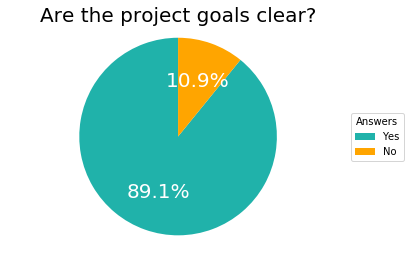

In [40]:
pie_chart_cleancode(1)

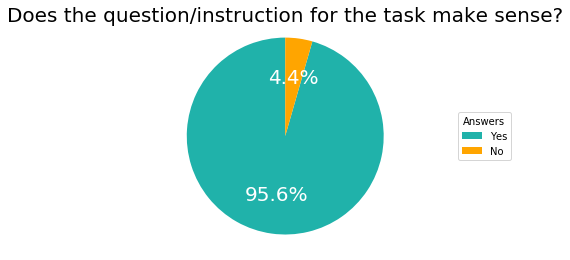

In [9]:
pie_chart(2)

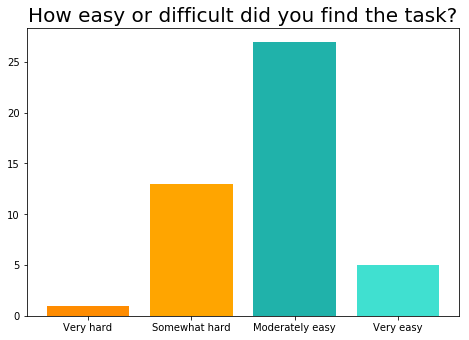

In [42]:
bar_plot(3)

In [75]:
comments(4)

Q:  If you answered 'Somewhat hard' or 'Very hard' which of the following best describes the problem?
 
A:  Image resolution too low
A:  Subject too complicated, Image resolution too low
A:  Subject too complicated
A:  Subject too complicated, Image resolution too low, How much of the image are we supposed to look at, in order to classify it? "The center" is too vague. Including an outline around the pertinent area of the image would help.
A:  Subject too complicated, Image resolution too low
A:  Image resolution too low, Too ambiguous, can't decide between two categories
A:  Too many steps
A:  Image resolution too low
A:  Subject too complicated
A:  division between selections to choose from is a bit vague
A:  Image resolution too low
A:  It would be helpful if the examples in the field guide were circled or had arrows pointing to them as I wasn't sure which part of the guide images I was supposed to be looking at
A:  Need more examples.  Like when sort of colored blend in the middle,

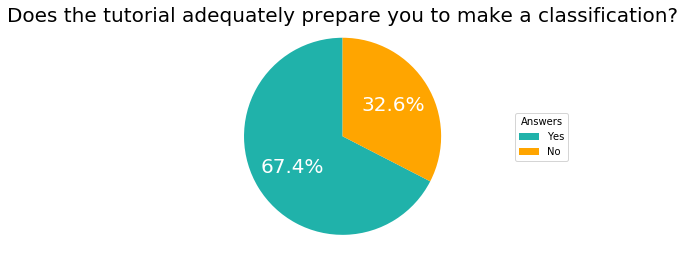

In [54]:
pie_chart(5)

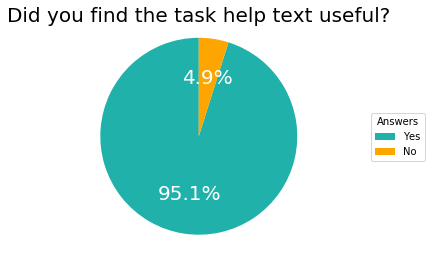

In [12]:
pie_chart(6)

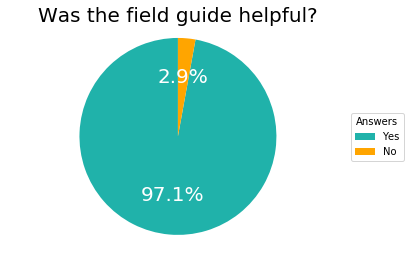

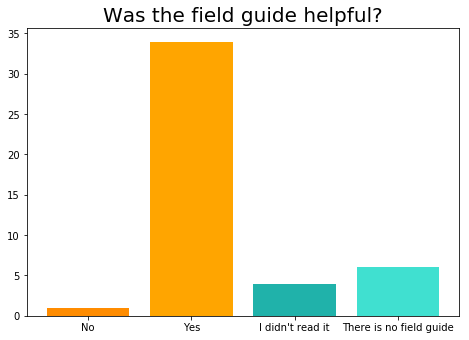

In [76]:
pie_chart(7)
bar_plot_field(7)

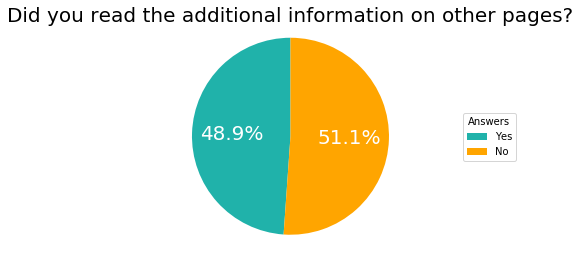

In [14]:
pie_chart(8)

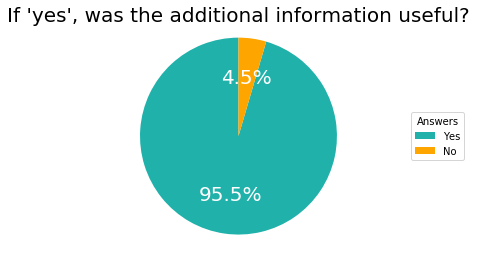

In [15]:
pie_chart(9)

In [77]:
comments(10)

Q:  What (if any) additional information would you like added to the project?
 
A:  Make the difference between galaxies and clusters images more clear, they look the same.
A:  The RA/Dec of the galaxies, so its possible to look at the objects in better detail in surveys like DSS or SDSS
A:  Very difficult to determine if what I was seeing met the criteria I was asking to determine
A:  Some images are hard to tell which  one is in the center.
A:  I was unable to find clear examples of what would count as a bright galaxy or fuzzy.
A:  Having some additional context around why the classification project is important or relevant would be motivating. Having milestones to mark one's progress and take breaks would be helpful (ex., "So far you have classified 25 galaxies and 7 objects and your progress has been saved. Would you like to continue?").
A:  What classifies an object to be far away vs. close. And how are we supposed to classify a galaxy with a bright center, yet a large fluffy body

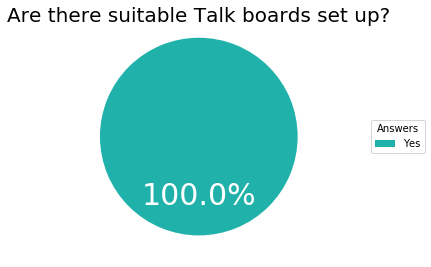

In [16]:
pie_chart(11)

In [78]:
comments(12)

Q:  If you answered 'no' to the previous question, please tell us what Talk boards you would like to see.
 


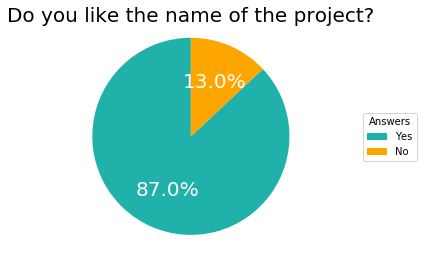

In [17]:
pie_chart(13)

In [79]:
comments(14)

Q:  If you answered 'no' to the previous question, please feel free to suggest a name here.
 
A:  Frazzled Galaxies!  Fluffy Galaxies!
A:  Fornax faint galaxies
A:  It's a cute name, but as i noted above the label "fluffy" can be confusing in this context.  Perhaps some other characteristic of these galaxies?


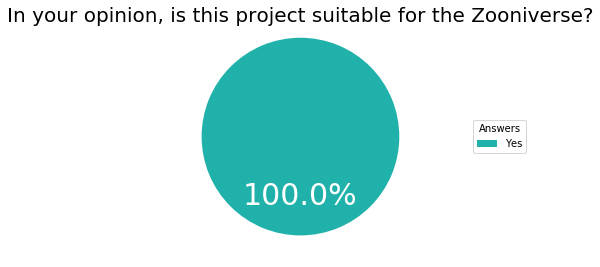

In [18]:
pie_chart(15)

In [80]:
comments(16)

Q:  If you answered 'No' to the previous question, please tell us why.
 


In [81]:
comments(17)

Q:  Do you have any other comments on the project?
 
A:  I think it would be great to have a page to learn about galaxies for newcomers.
A:  It would be nice to have a bit more information in the tutorial. For example, showing the steps and some examples. The "need some help" section was really useful, so this wasn't a big issue, it would just be a "nice to have".
A:  No
A:  A mark at the center of each image would be helpful in finding the central galaxy, especially in crowded subjects.
A:  Seems like a great idea. I'd love to contribute to this.
A:  Where is "the very center of the image"? Would help if there was a red circle or similar. Or does it matter if what I think is a galaxy is not in the exact center of the image? 
A:  Great project. I think volunteers will work hard to improve their 'skill' levels.   
A:  More examples. There is no practical information in the tutorial
A:  no :)
A:  Field guide pictures look too long to load, make them lower resolution?  Some of the images 

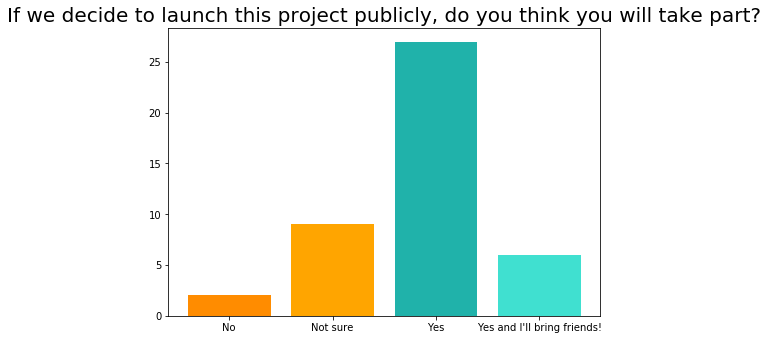

In [61]:
bar_plot_friends(18)